In [1]:
#the KNN algorithm
import numpy as np
%matplotlib inline      
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
import sklearn


euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)
minkowski_p3 = lambda x1, x2: np.cbrt(np.sum((abs(x1 - x2))**3, axis=-1))
#cosine_similarity = lambda a, b: np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))

class KNN:
    def __init__(self, K, dist_fn):
        self.dist_fn = dist_fn
        self.K = K
        return
    
    def fit(self, x, y):
        ''' Store the training data using this method as it is a lazy learner'''
        self.x = x
        self.y = y
        self.C = np.max(y) + 1
        self.C = int(self.C.item())
        return self

    def accuracy(self, TestData, outputset):
      rightLabel= 0
      WrongLabel = 0
      for i in range(len(TestData)):
          if TestData[i][0] == outputset[i]:
              rightLabel +=1
          else:
              WrongLabel +=1
      return [(rightLabel/len(outputset)*100), WrongLabel]

    #get the weights for closest neighbors
    def CalVotes(self,data):
        for i in data:
            vote = 1/i[1]
            i.append(vote)
        data.sort(key=itemgetter(2))
        return data[0][0]

    # KNN Algorithm'''
        

    def predict(self, x_test):
        ''' Makes a prediction using the stored training data and the test data given as argument'''

        num_test = x_test.shape[0]
        #calculate distance between the training & test samples and returns an array of shape [num_test, num_train]
        distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])

        #ith-row of knns stores the indices of k closest training samples to the ith-test sample 
        knns = np.zeros((num_test, self.K), dtype=int)
        #ith-row of y_prob has the probability distribution over C classes
        y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            knns[i,:] = np.argsort(distances[i])[:self.K]
            y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C) #counts the number of instances of each class in the K-closest training samples
        #y_prob /= np.sum(y_prob, axis=-1, keepdims=True)
        #simply divide by K to get a probability distribution
        y_prob /= self.K

        # result = CalVotes(knns)
        return y_prob, knns

# Evaluation Function

In [2]:
def evaluate_acc(true_labels, target_labels):
  return np.sum(true_labels == target_labels)/true_labels.shape[0]

# Dataset Pre-Processing





In [3]:
#cleaning the csv files -> converting them to numpy arrays
np.random.seed(1346)

breast_cancer_panda = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',header=None)# modify the header to none since no col name in the dataset
breast_cancer_panda = breast_cancer_panda[~breast_cancer_panda.eq('?').any(1)] 
breast_cancer_np = breast_cancer_panda.to_numpy().astype(np.float)
hepatitis_panda = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data',header=None)# modify the header to none since no col name in the dataset
hepatitis_panda = hepatitis_panda[~hepatitis_panda.eq('?').any(1)] 
hepatitis_np = hepatitis_panda.to_numpy().astype(np.float)
#splitting the numpy 2d array to obtain the data_points and the labels as two sets of data
#this way the data format matches the input data format required by the KNN algorithm in class
breast_x = breast_cancer_np[:,1:10]
for c in range(breast_x.shape[1]):
  breast_x[:,c] = (breast_x[:,c] - breast_x[:,c].min())/(breast_x[:,c].max() - breast_x[:,c].min())   # rescaling the data st all data distributing in [0,1]
breast_y = breast_cancer_np[:,10].astype(int)
for i in range(breast_y.shape[0]):    # change the class 2 and 4 to 1 and 2 
  breast_y[i] = int(breast_y[i]/2)

hepatitis_x = hepatitis_np[:,1:]
for c in range(hepatitis_x.shape[1]):
  hepatitis_x[:,c] = (hepatitis_x[:,c] - hepatitis_x[:,c].min())/(hepatitis_x[:,c].max() - hepatitis_x[:,c].min())   # rescaling the data st all data distributing in [0,1]
hepatitis_y = hepatitis_np[:,0].astype(int)


#feature selection
breast_x_fs = SelectKBest(score_func=chi2,k=2).fit_transform(breast_x,breast_y)
hepatitis_x_fs = SelectKBest(score_func=chi2,k=4).fit_transform(hepatitis_x,hepatitis_y)

#partitioning the two datasets into training_set and test_set
breast_data_num = breast_x.shape[0]
hepatitis_data_num = hepatitis_x.shape[0]
breast_partition = int(breast_data_num*0.8)
hepatitis_partition = int(hepatitis_data_num*0.8)
breast_inds = np.random.permutation(breast_data_num)
hepatitis_inds = np.random.permutation(hepatitis_data_num)

breast_x_train, breast_y_train = breast_x[breast_inds[:breast_partition]], breast_y[breast_inds[:breast_partition]]
breast_x_test, breast_y_test = breast_x[breast_inds[breast_partition:]], breast_y[breast_inds[breast_partition:]]

hepatitis_x_train, hepatitis_y_train = hepatitis_x[hepatitis_inds[:hepatitis_partition]], hepatitis_y[hepatitis_inds[:hepatitis_partition]]
hepatitis_x_test, hepatitis_y_test = hepatitis_x[hepatitis_inds[hepatitis_partition:]], hepatitis_y[hepatitis_inds[hepatitis_partition:]]



#partitioning the two datasets into traing set and test set after feature selection
breast_x_train_fs = breast_x_fs[breast_inds[:breast_partition]]
breast_x_test_fs = breast_x_fs[breast_inds[breast_partition:]]

hepatitis_x_train_fs = hepatitis_x_fs[hepatitis_inds[:hepatitis_partition]]
hepatitis_x_test_fs = hepatitis_x_fs[hepatitis_inds[hepatitis_partition:]]



# Visualization of the breast cancer data

Text(0.5, 0, 'Clump Thickness')

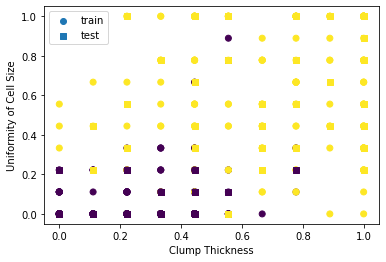

In [4]:

plt.scatter(breast_x_train[:,0], breast_x_train[:,1], c=breast_y_train, marker='o', label='train')
plt.scatter(breast_x_test[:,0], breast_x_test[:,1], c=breast_y_test, marker='s', label='test')
plt.legend()
plt.ylabel('Uniformity of Cell Size')
plt.xlabel('Clump Thickness')


# Visualization of the  hepatitis data

Text(0.5, 0, 'Age')

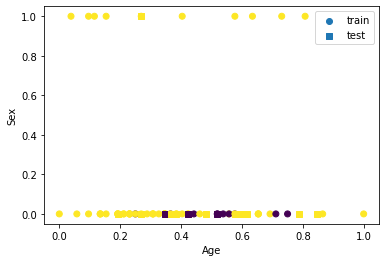

In [5]:

plt.scatter(hepatitis_x_train[:,0], hepatitis_x_train[:,1], c=hepatitis_y_train, marker='o', label='train')
plt.scatter(hepatitis_x_test[:,0], hepatitis_x_test[:,1], c=hepatitis_y_test, marker='s', label='test')
plt.legend()
plt.ylabel('Sex')
plt.xlabel('Age')

#Plot the distribution of features of cancer dataset


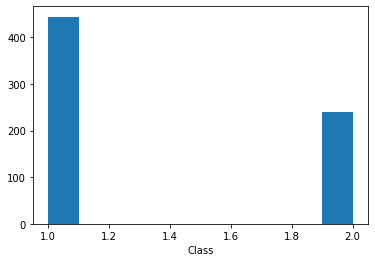

683 valid instances in hepatitis dataset, 239 instances are classified as DIE, 0 instances are classified as LIVE


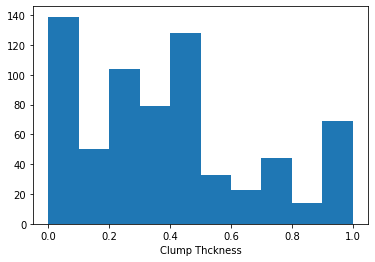

Standard deviation of Clump Thckness: 0.31318839815899113
Mean of Clump Clump Thckness: 0.38246299007646006
Median of Clump Clump Thckness: 0.3333333333333333


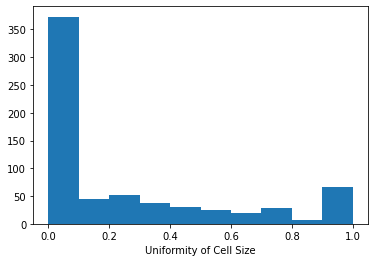

Standard deviation of Uniformity of Cell Size: 0.34032223892826713
Mean of Clump Uniformity of Cell Size: 0.2389783634293151
Median of Clump Uniformity of Cell Size: 0.0


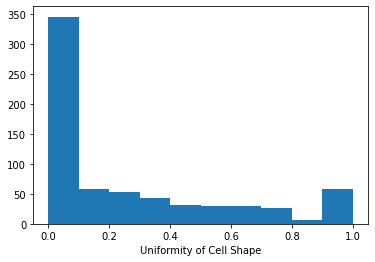

Standard deviation of Uniformity of Cell Shape: 0.33182135369247295
Mean of Clump Uniformity of Cell Shape: 0.2461363266634131
Median of Clump Uniformity of Cell Shape: 0.0


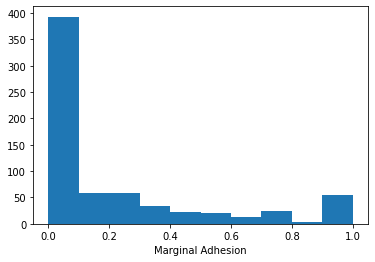

Standard deviation of Marginal Adhesion: 0.318051597581733
Mean of Clump Marginal Adhesion: 0.20335122824141857
Median of Clump Marginal Adhesion: 0.0


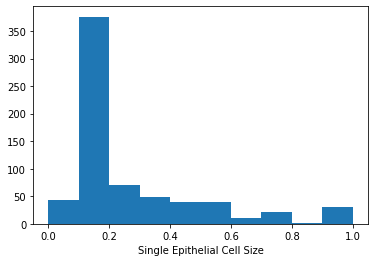

Standard deviation of Single Epithelial Cell Size: 0.24682860206002305
Mean of Clump Single Epithelial Cell Size: 0.24825117943712383
Median of Clump Single Epithelial Cell Size: 0.1111111111111111


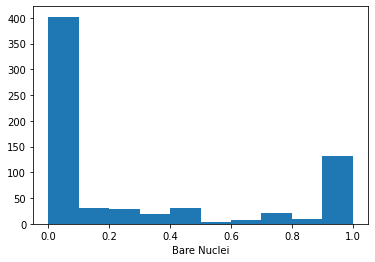

Standard deviation of Bare Nuclei: 0.4045765161319699
Mean of Clump Bare Nuclei: 0.2827395477468684
Median of Clump Bare Nuclei: 0.0


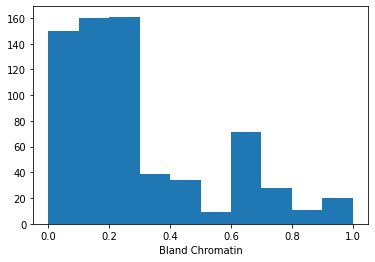

Standard deviation of Bland Chromatin: 0.27198917554540414
Mean of Clump Bland Chromatin: 0.27167724093053525
Median of Clump Bland Chromatin: 0.2222222222222222


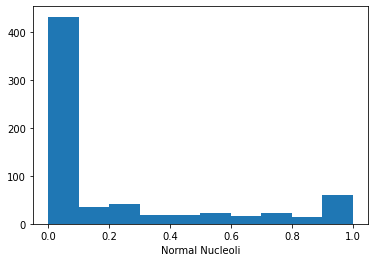

Standard deviation of Normal Nucleoli: 0.3389367599989157
Mean of Clump Normal Nucleoli: 0.20774361477143322
Median of Clump Normal Nucleoli: 0.0


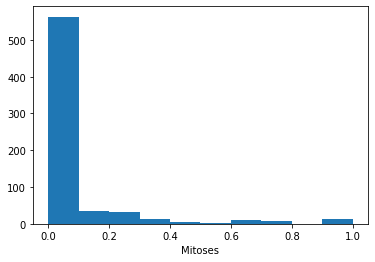

Standard deviation of Mitoses: 0.19237836140156037
Mean of Clump Mitoses: 0.06702456482837156
Median of Clump Mitoses: 0.0


In [6]:
#plot the distribution of features of cancer dataset
feature_dict = {'Clump Thckness': breast_x[:, 0], 
                'Uniformity of Cell Size': breast_x[:, 1], 
                'Uniformity of Cell Shape': breast_x[:, 2],
                'Marginal Adhesion': breast_x[:, 3],
                'Single Epithelial Cell Size': breast_x[:,4],
                'Bare Nuclei': breast_x[:, 5],
                'Bland Chromatin': breast_x[:, 6],
                'Normal Nucleoli': breast_x[:, 7],
                'Mitoses': breast_x[:, 8]}
plt.hist(breast_y)
plt.xlabel('Class')
plt.show()  
benign = np.count_nonzero(breast_y==2)
malignant = np.count_nonzero(breast_y==4)
print(f'{breast_y.shape[0]} valid instances in hepatitis dataset, {benign} instances are classified as DIE, {malignant} instances are classified as LIVE')

for name, data in feature_dict.items():
  plt.hist(data)
  plt.xlabel(name)
  plt.show()
  print(f"Standard deviation of {name}: {np.std(data)}")
  print(f"Mean of Clump {name}: {np.mean(data)}")
  print(f"Median of Clump {name}: {np.median(data)}")

# Plot the distribution for the first class of breast cancer dataset

From this, we can find the relevence between features and class

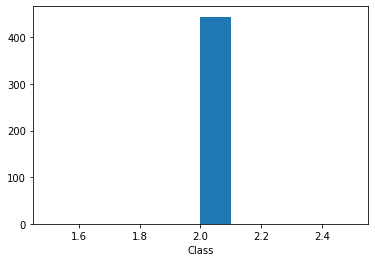

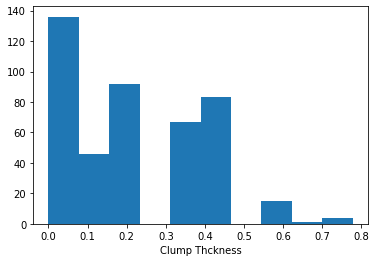

Variance of Clump Thckness: 0.03446289131974818
Mean of Clump Clump Thckness: 0.2182182182182182
Median of Clump Clump Thckness: 0.2222222222222222


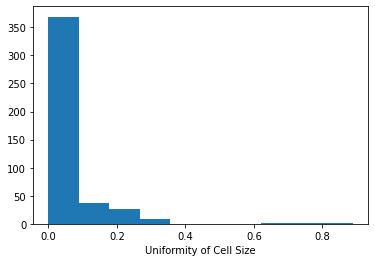

Variance of Uniformity of Cell Size: 0.009018528037547057
Mean of Clump Uniformity of Cell Size: 0.03403403403403403
Median of Clump Uniformity of Cell Size: 0.0


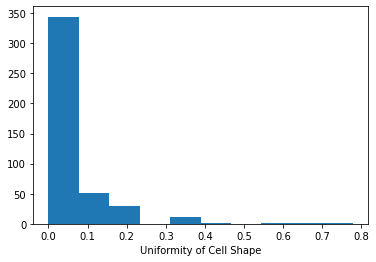

Variance of Uniformity of Cell Shape: 0.011282052823594364
Mean of Clump Uniformity of Cell Shape: 0.04604604604604604
Median of Clump Uniformity of Cell Shape: 0.0


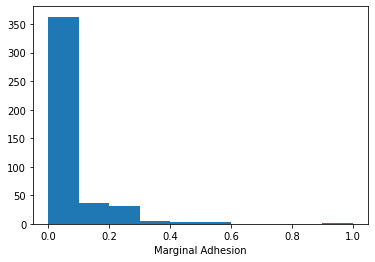

Variance of Marginal Adhesion: 0.010359959559158758
Mean of Clump Marginal Adhesion: 0.03853853853853854
Median of Clump Marginal Adhesion: 0.0


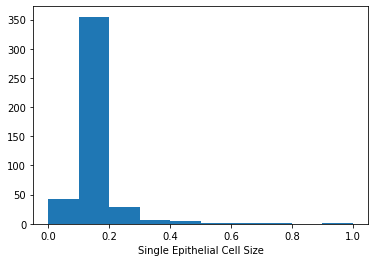

Variance of Single Epithelial Cell Size: 0.009476443410377344
Mean of Clump Single Epithelial Cell Size: 0.12312312312312314
Median of Clump Single Epithelial Cell Size: 0.1111111111111111


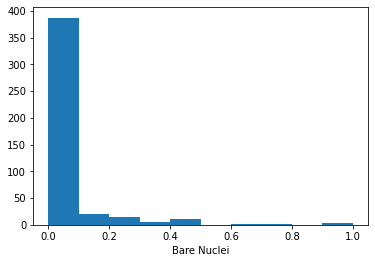

Variance of Bare Nuclei: 0.01708891073255437
Mean of Clump Bare Nuclei: 0.03853853853853854
Median of Clump Bare Nuclei: 0.0


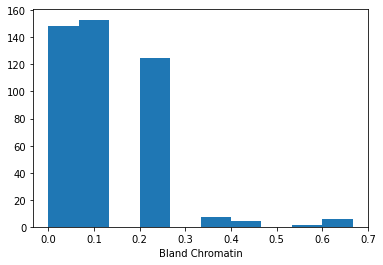

Variance of Bland Chromatin: 0.013900474548622695
Mean of Clump Bland Chromatin: 0.12037037037037038
Median of Clump Bland Chromatin: 0.1111111111111111


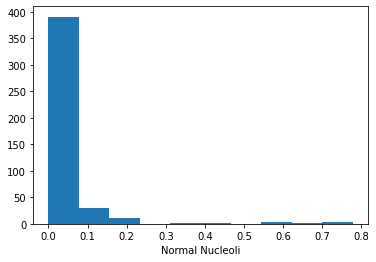

Variance of Normal Nucleoli: 0.011224938652366083
Mean of Clump Normal Nucleoli: 0.02902902902902903
Median of Clump Normal Nucleoli: 0.0


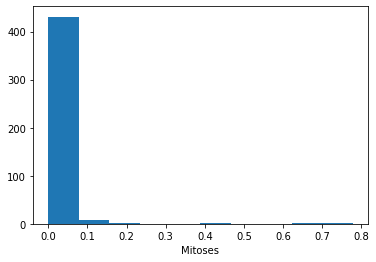

Variance of Mitoses: 0.00320058547035524
Mean of Clump Mitoses: 0.007257257257257258
Median of Clump Mitoses: 0.0


In [7]:
first_class=breast_cancer_np[breast_cancer_np[...,-1]==2] # get the data which have class 2

breast_x_f = first_class[:,1:10]
breast_y_f = first_class[:,10].astype(int)
#plot the distribution of features of the first class
feature_dict = {'Clump Thckness': first_class[:, 1], 
                'Uniformity of Cell Size': first_class[:, 2], 
                'Uniformity of Cell Shape': first_class[:, 3],
                'Marginal Adhesion': first_class[:, 4],
                'Single Epithelial Cell Size': first_class[:, 5],
                'Bare Nuclei': first_class[:, 6],
                'Bland Chromatin': first_class[:, 7],
                'Normal Nucleoli': first_class[:, 8],
                'Mitoses': first_class[:, 9]}
plt.hist(breast_y_f)
plt.xlabel('Class')
plt.show()  
for name, data in feature_dict.items():
  plt.hist(data)
  plt.xlabel(name)
  plt.show()
  print(f"Variance of {name}: {np.var(data)}")
  print(f"Mean of Clump {name}: {np.mean(data)}")
  print(f"Median of Clump {name}: {np.median(data)}")

#Plot the distribution for the second class of breast cancer dataset

From this, we can find the relevence between features and class

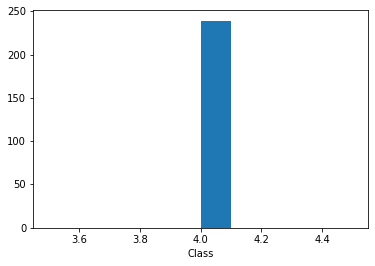

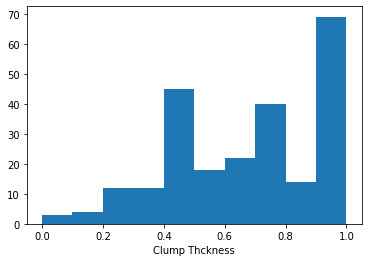

Variance of Clump Thckness: 0.07306819549835837
Mean of Clump Clump Thckness: 0.6875871687587168
Median of Clump Clump Thckness: 0.7777777777777778


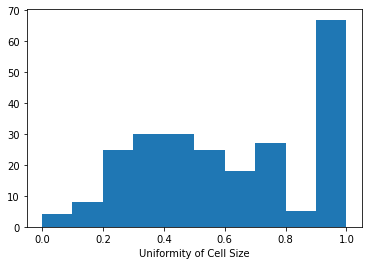

Variance of Uniformity of Cell Size: 0.09124014626952837
Mean of Clump Uniformity of Cell Size: 0.6197117619711761
Median of Clump Uniformity of Cell Size: 0.5555555555555556


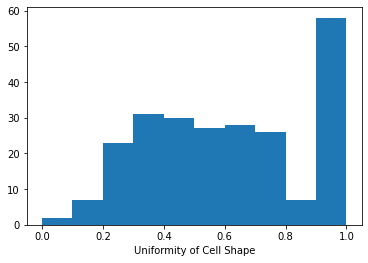

Variance of Uniformity of Cell Shape: 0.08114418579921635
Mean of Clump Uniformity of Cell Shape: 0.6178521617852162
Median of Clump Uniformity of Cell Shape: 0.5555555555555556


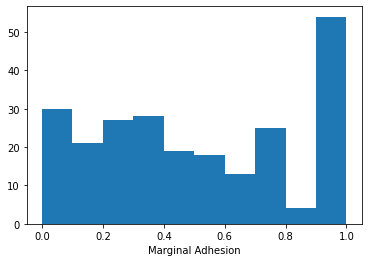

Variance of Marginal Adhesion: 0.125625891409637
Mean of Clump Marginal Adhesion: 0.509530450953045
Median of Clump Marginal Adhesion: 0.4444444444444444


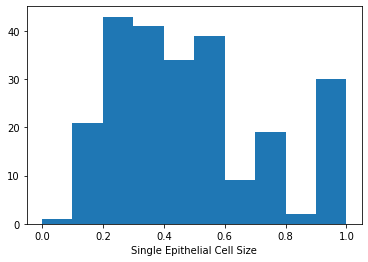

Variance of Single Epithelial Cell Size: 0.07337899339089797
Mean of Clump Single Epithelial Cell Size: 0.4807066480706648
Median of Clump Single Epithelial Cell Size: 0.4444444444444444


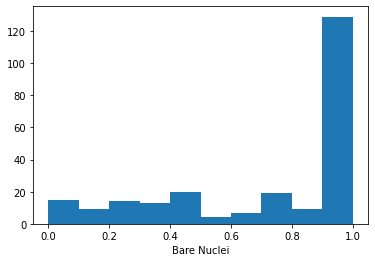

Variance of Bare Nuclei: 0.11942030789740038
Mean of Clump Bare Nuclei: 0.7364016736401674
Median of Clump Bare Nuclei: 1.0


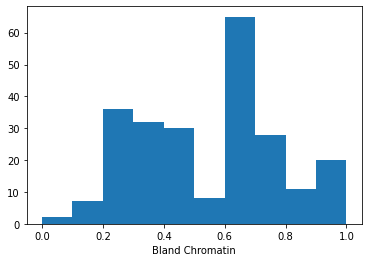

Variance of Bland Chromatin: 0.06404511454026227
Mean of Clump Bland Chromatin: 0.5527661552766154
Median of Clump Bland Chromatin: 0.6666666666666666


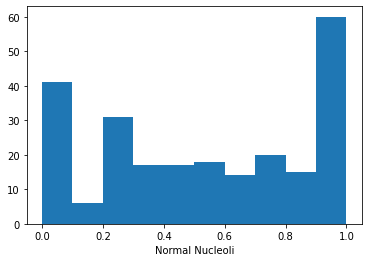

Variance of Normal Nucleoli: 0.13787712071472277
Mean of Clump Normal Nucleoli: 0.5397489539748954
Median of Clump Normal Nucleoli: 0.5555555555555556


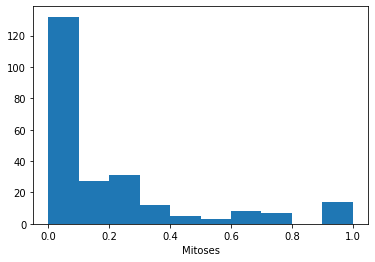

Variance of Mitoses: 0.08085327205557362
Mean of Clump Mitoses: 0.17805671780567178
Median of Clump Mitoses: 0.0


In [8]:
second_class=breast_cancer_np[breast_cancer_np[...,-1]==4] # get the data which have class 4

breast_x_s = second_class[:,1:10]
breast_y_s = second_class[:,10].astype(int)
#plot the distribution of features of the second class
feature_dict = {'Clump Thckness': second_class[:, 1], 
                'Uniformity of Cell Size': second_class[:, 2], 
                'Uniformity of Cell Shape': second_class[:, 3],
                'Marginal Adhesion': second_class[:, 4],
                'Single Epithelial Cell Size': second_class[:, 5],
                'Bare Nuclei': second_class[:, 6],
                'Bland Chromatin': second_class[:, 7],
                'Normal Nucleoli': second_class[:, 8],
                'Mitoses': second_class[:, 9]}
plt.hist(breast_y_s)
plt.xlabel('Class')
plt.show()  
          
for name, data in feature_dict.items():
  plt.hist(data)
  plt.xlabel(name)
  plt.show()
  print(f"Variance of {name}: {np.var(data)}")
  print(f"Mean of Clump {name}: {np.mean(data)}")
  print(f"Median of Clump {name}: {np.median(data)}")

# Plot the distribution of each class in hepatitis dataset

We can see the total distribution of each feature. 

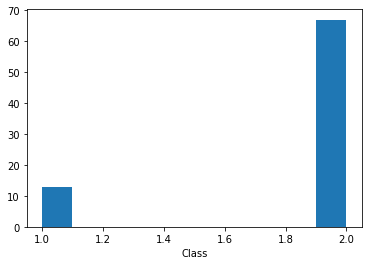

80 valid instances in hepatitis dataset, 13 instances are classified as DIE, 67 instances are classified as LIVE


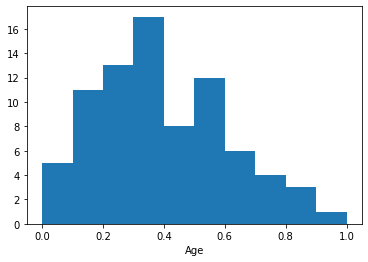

Variance of Age: 0.04646767520340237
Mean of Clump Age: 0.3973557692307692
Median of Clump Age: 0.3557692307692307


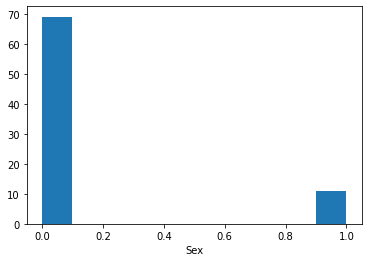

Variance of Sex: 0.11859375000000001
Mean of Clump Sex: 0.1375
Median of Clump Sex: 0.0


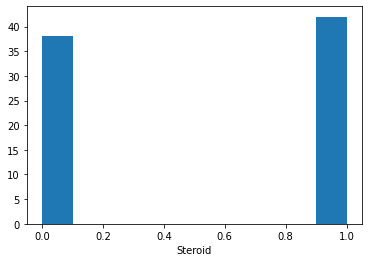

Variance of Steroid: 0.24937499999999999
Mean of Clump Steroid: 0.525
Median of Clump Steroid: 1.0


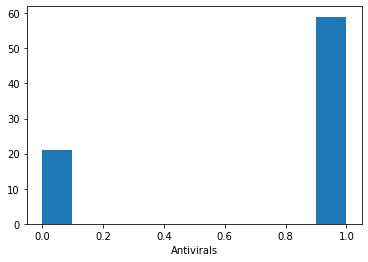

Variance of Antivirals: 0.19359374999999998
Mean of Clump Antivirals: 0.7375
Median of Clump Antivirals: 1.0


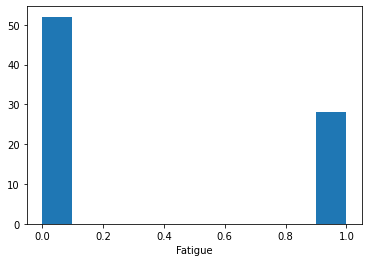

Variance of Fatigue: 0.22749999999999998
Mean of Clump Fatigue: 0.35
Median of Clump Fatigue: 0.0


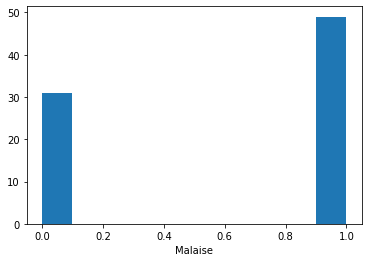

Variance of Malaise: 0.23734375000000002
Mean of Clump Malaise: 0.6125
Median of Clump Malaise: 1.0


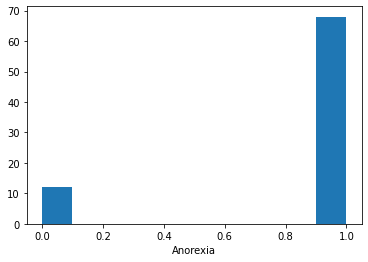

Variance of Anorexia: 0.12749999999999997
Mean of Clump Anorexia: 0.85
Median of Clump Anorexia: 1.0


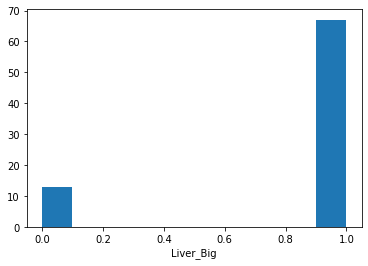

Variance of Liver_Big: 0.13609374999999999
Mean of Clump Liver_Big: 0.8375
Median of Clump Liver_Big: 1.0


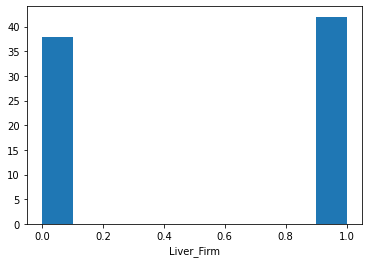

Variance of Liver_Firm: 0.24937499999999996
Mean of Clump Liver_Firm: 0.525
Median of Clump Liver_Firm: 1.0


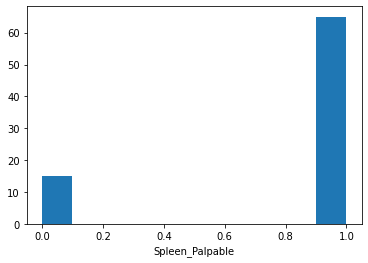

Variance of Spleen_Palpable: 0.15234375
Mean of Clump Spleen_Palpable: 0.8125
Median of Clump Spleen_Palpable: 1.0


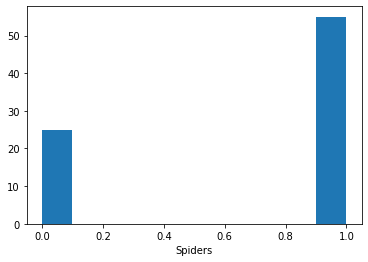

Variance of Spiders: 0.21484375
Mean of Clump Spiders: 0.6875
Median of Clump Spiders: 1.0


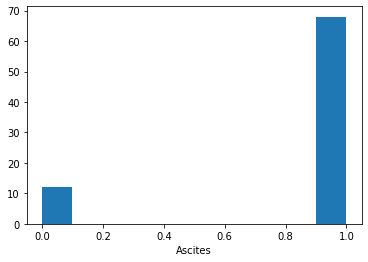

Variance of Ascites: 0.1275
Mean of Clump Ascites: 0.85
Median of Clump Ascites: 1.0


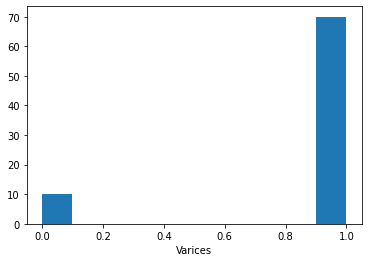

Variance of Varices: 0.109375
Mean of Clump Varices: 0.875
Median of Clump Varices: 1.0


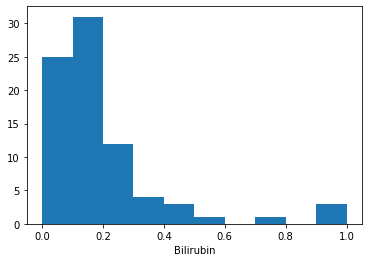

Variance of Bilirubin: 0.037354243827160495
Mean of Clump Bilirubin: 0.20472222222222225
Median of Clump Bilirubin: 0.15555555555555556


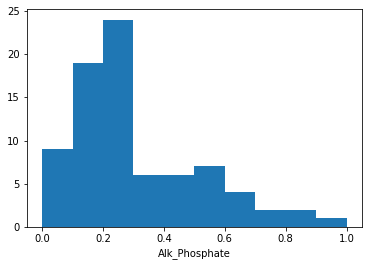

Variance of Alk_Phosphate: 0.04411355080522661
Mean of Clump Alk_Phosphate: 0.3028051181102362
Median of Clump Alk_Phosphate: 0.23228346456692914


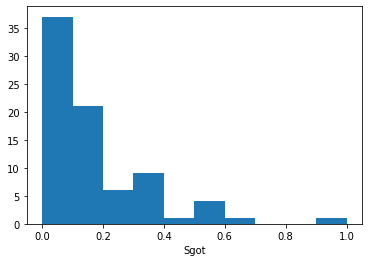

Variance of Sgot: 0.030712188933242734
Mean of Clump Sgot: 0.16754926108374385
Median of Clump Sgot: 0.10467980295566504


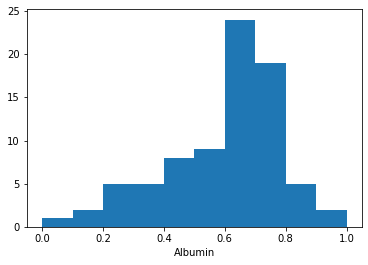

Variance of Albumin: 0.03899654429250892
Mean of Clump Albumin: 0.6012931034482759
Median of Clump Albumin: 0.6551724137931034


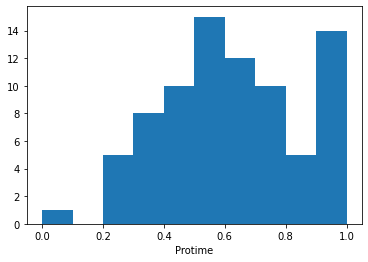

Variance of Protime: 0.054199984374999996
Mean of Clump Protime: 0.6251249999999999
Median of Clump Protime: 0.62


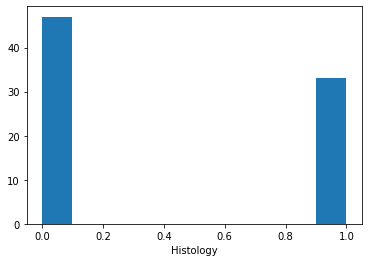

Variance of Histology: 0.24234375000000002
Mean of Clump Histology: 0.4125
Median of Clump Histology: 0.0


In [9]:
plt.hist(hepatitis_y)
plt.xlabel('Class')
plt.show()
die = np.count_nonzero(hepatitis_y==1)
live = np.count_nonzero(hepatitis_y==2)
print(f'{hepatitis_y.shape[0]} valid instances in hepatitis dataset, {die} instances are classified as DIE, {live} instances are classified as LIVE')

#plot the distribution of features of the first class
feature_dict = {'Age': hepatitis_x[:, 0], 
                'Sex': hepatitis_x[:, 1], 
                'Steroid': hepatitis_x[:, 2],
                'Antivirals': hepatitis_x[:, 3],
                'Fatigue': hepatitis_x[:, 4],
                'Malaise': hepatitis_x[:, 5],
                'Anorexia': hepatitis_x[:, 6],
                'Liver_Big': hepatitis_x[:, 7],
                'Liver_Firm': hepatitis_x[:, 8],
                'Spleen_Palpable': hepatitis_x[:, 9],
                'Spiders': hepatitis_x[:, 10],
                'Ascites': hepatitis_x[:, 11],
                'Varices': hepatitis_x[:, 12],
                'Bilirubin': hepatitis_x[:, 13],
                'Alk_Phosphate': hepatitis_x[:, 14],
                'Sgot': hepatitis_x[:, 15],
                'Albumin': hepatitis_x[:, 16],
                'Protime': hepatitis_x[:, 17],
                'Histology': hepatitis_x[:, 18],
                }

for name, data in feature_dict.items():
  plt.hist(data)
  plt.xlabel(name)
  plt.show()
  print(f"Variance of {name}: {np.var(data)}")
  print(f"Mean of Clump {name}: {np.mean(data)}")
  print(f"Median of Clump {name}: {np.median(data)}")

# Plot the distribution for the first class of hepatitis dataset

From this, we can find the relevence between features and class

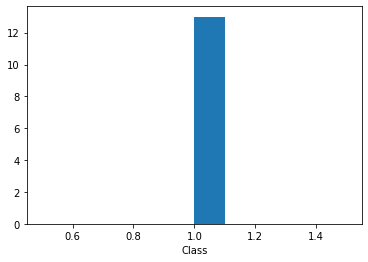

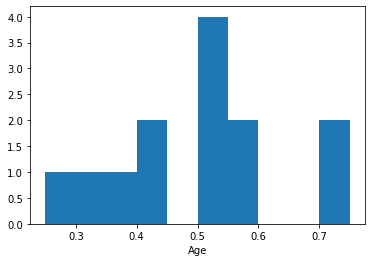

Variance of Age: 0.01789153040859914
Mean of Clump Age: 0.5014792899408284
Median of Clump Age: 0.5192307692307693


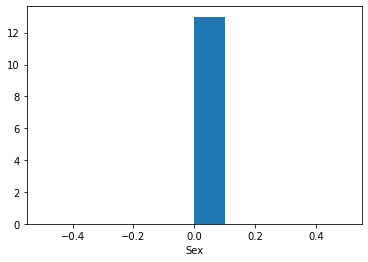

Variance of Sex: 0.0
Mean of Clump Sex: 0.0
Median of Clump Sex: 0.0


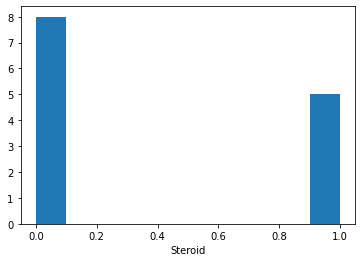

Variance of Steroid: 0.23668639053254442
Mean of Clump Steroid: 0.38461538461538464
Median of Clump Steroid: 0.0


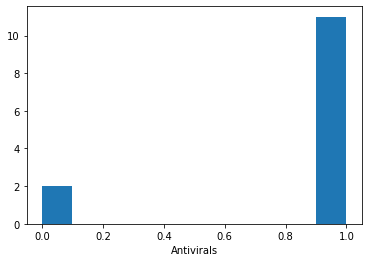

Variance of Antivirals: 0.13017751479289938
Mean of Clump Antivirals: 0.8461538461538461
Median of Clump Antivirals: 1.0


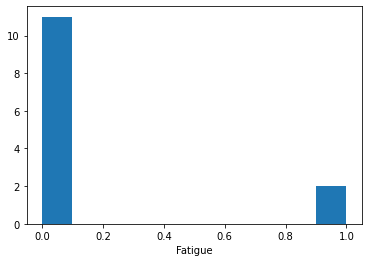

Variance of Fatigue: 0.13017751479289938
Mean of Clump Fatigue: 0.15384615384615385
Median of Clump Fatigue: 0.0


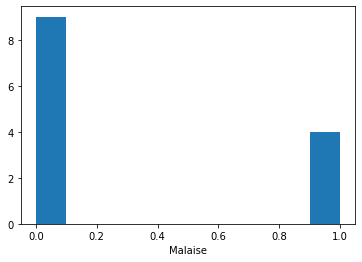

Variance of Malaise: 0.21301775147928995
Mean of Clump Malaise: 0.3076923076923077
Median of Clump Malaise: 0.0


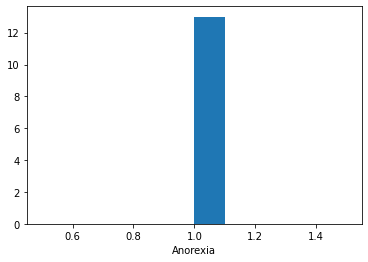

Variance of Anorexia: 0.0
Mean of Clump Anorexia: 1.0
Median of Clump Anorexia: 1.0


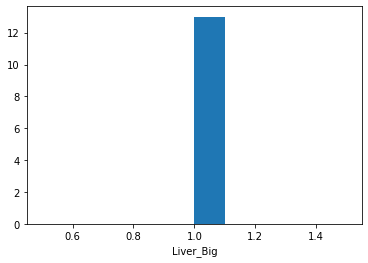

Variance of Liver_Big: 0.0
Mean of Clump Liver_Big: 1.0
Median of Clump Liver_Big: 1.0


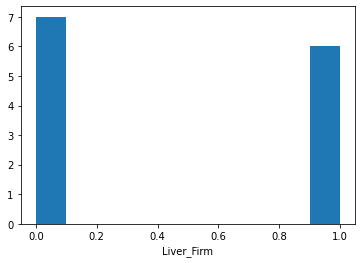

Variance of Liver_Firm: 0.24852071005917165
Mean of Clump Liver_Firm: 0.46153846153846156
Median of Clump Liver_Firm: 0.0


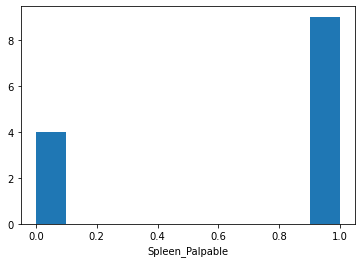

Variance of Spleen_Palpable: 0.21301775147928995
Mean of Clump Spleen_Palpable: 0.6923076923076923
Median of Clump Spleen_Palpable: 1.0


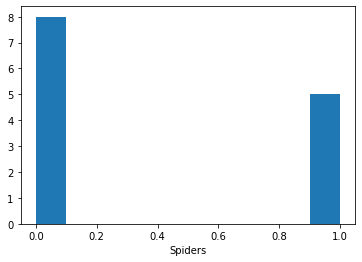

Variance of Spiders: 0.23668639053254442
Mean of Clump Spiders: 0.38461538461538464
Median of Clump Spiders: 0.0


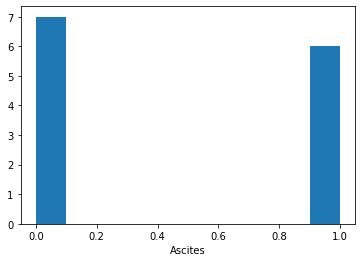

Variance of Ascites: 0.24852071005917165
Mean of Clump Ascites: 0.46153846153846156
Median of Clump Ascites: 0.0


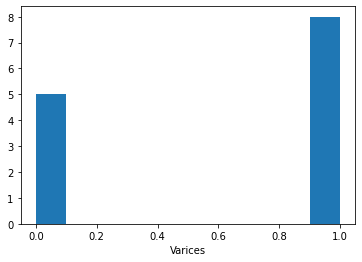

Variance of Varices: 0.23668639053254442
Mean of Clump Varices: 0.6153846153846154
Median of Clump Varices: 1.0


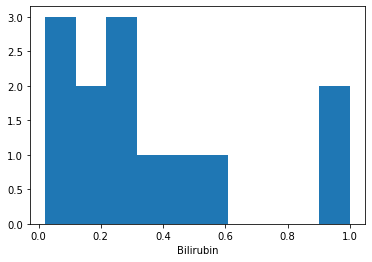

Variance of Bilirubin: 0.0914602965885017
Mean of Clump Bilirubin: 0.358974358974359
Median of Clump Bilirubin: 0.26666666666666666


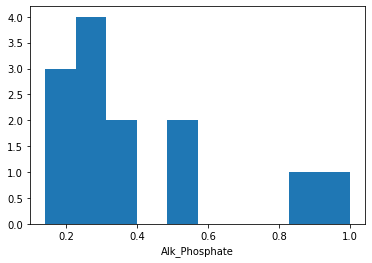

Variance of Alk_Phosphate: 0.06669507421855082
Mean of Clump Alk_Phosphate: 0.3930950938824954
Median of Clump Alk_Phosphate: 0.29133858267716534


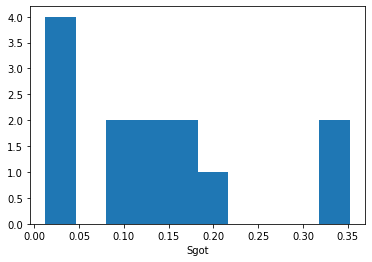

Variance of Sgot: 0.011956298395780439
Mean of Clump Sgot: 0.13622584312239486
Median of Clump Sgot: 0.1330049261083744


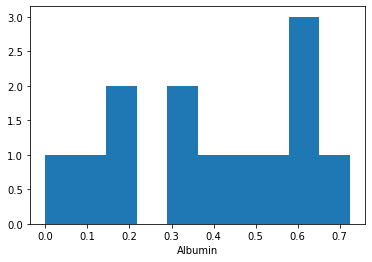

Variance of Albumin: 0.04429778581429546
Mean of Clump Albumin: 0.38726790450928383
Median of Clump Albumin: 0.4137931034482758


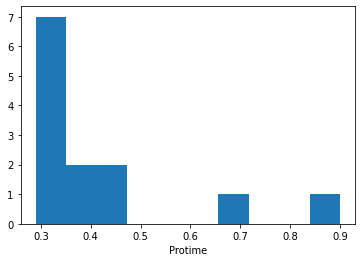

Variance of Protime: 0.0287621301775148
Mean of Clump Protime: 0.4161538461538461
Median of Clump Protime: 0.35


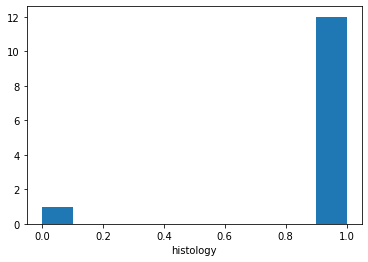

Variance of histology: 0.07100591715976333
Mean of Clump histology: 0.9230769230769231
Median of Clump histology: 1.0


In [10]:
first_class=hepatitis_np[hepatitis_np[...,0]==1] # get the data which have class 1

first_hepatitis_x = first_class[:,1:]
first_hepatitis_y = first_class[:,0].astype(int)
#plot the distribution of features of the first class
feature_dict = {'Age': first_class[:, 1], 
                'Sex': first_class[:, 2], 
                'Steroid': first_class[:, 3],
                'Antivirals': first_class[:, 4],
                'Fatigue': first_class[:, 5],
                'Malaise': first_class[:, 6],
                'Anorexia': first_class[:, 7],
                'Liver_Big': first_class[:, 8],
                'Liver_Firm': first_class[:, 9],
                'Spleen_Palpable': first_class[:, 10],
                'Spiders': first_class[:, 11],
                'Ascites': first_class[:, 12],
                'Varices': first_class[:, 13],
                'Bilirubin': first_class[:, 14],
                'Alk_Phosphate': first_class[:, 15],
                'Sgot': first_class[:, 16],
                'Albumin': first_class[:, 17],
                'Protime': first_class[:, 18],
                'histology': first_class[:, 19]
                }
plt.hist(first_hepatitis_y)
plt.xlabel('Class')
plt.show()  
for name, data in feature_dict.items():
  plt.hist(data)
  plt.xlabel(name)
  plt.show()
  print(f"Variance of {name}: {np.var(data)}")
  print(f"Mean of Clump {name}: {np.mean(data)}")
  print(f"Median of Clump {name}: {np.median(data)}")

# Plot the distribution for the seond class of hepatitis dataset

From this, we can find the relevence between features and class

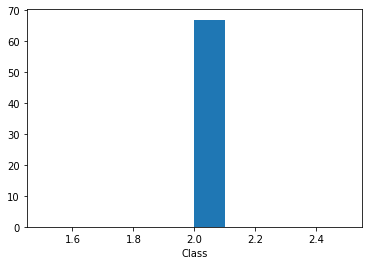

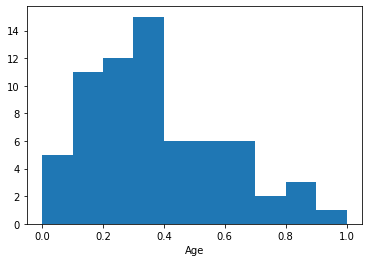

Variance of Age: 0.04950052132695175
Mean of Clump Age: 0.3771526980482204
Median of Clump Age: 0.34615384615384615


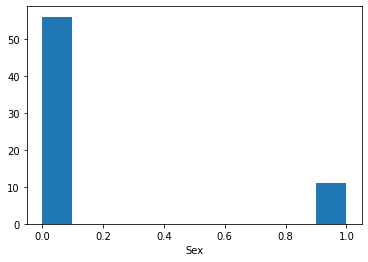

Variance of Sex: 0.1372243261305413
Mean of Clump Sex: 0.16417910447761194
Median of Clump Sex: 0.0


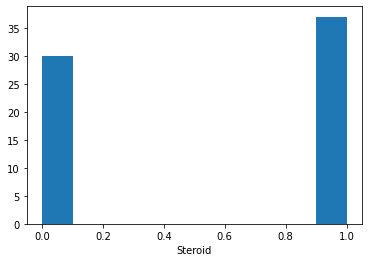

Variance of Steroid: 0.24727110715081313
Mean of Clump Steroid: 0.5522388059701493
Median of Clump Steroid: 1.0


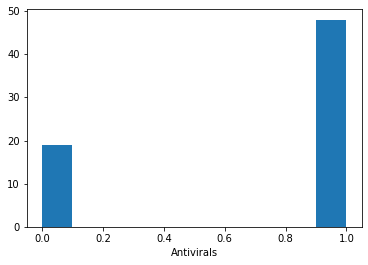

Variance of Antivirals: 0.20316328803742478
Mean of Clump Antivirals: 0.7164179104477612
Median of Clump Antivirals: 1.0


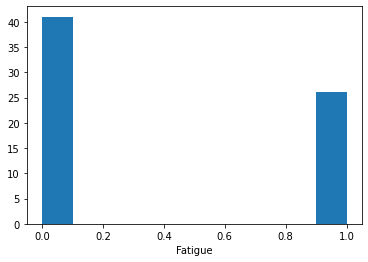

Variance of Fatigue: 0.23746936957006015
Mean of Clump Fatigue: 0.3880597014925373
Median of Clump Fatigue: 0.0


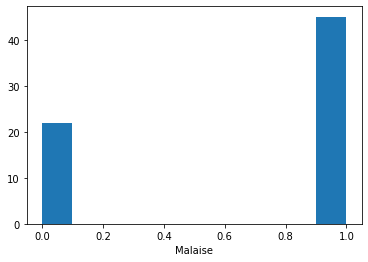

Variance of Malaise: 0.22053909556694143
Mean of Clump Malaise: 0.6716417910447762
Median of Clump Malaise: 1.0


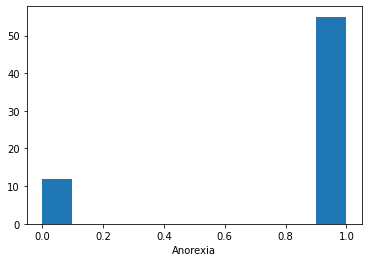

Variance of Anorexia: 0.14702606371129429
Mean of Clump Anorexia: 0.8208955223880597
Median of Clump Anorexia: 1.0


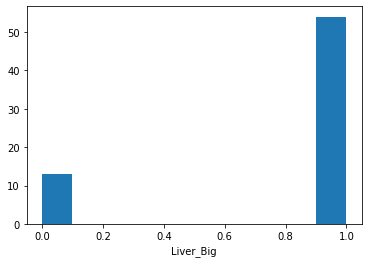

Variance of Liver_Big: 0.15638226776564942
Mean of Clump Liver_Big: 0.8059701492537313
Median of Clump Liver_Big: 1.0


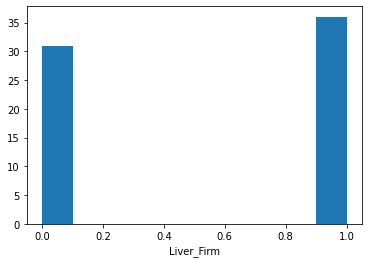

Variance of Liver_Firm: 0.2486077077300066
Mean of Clump Liver_Firm: 0.5373134328358209
Median of Clump Liver_Firm: 1.0


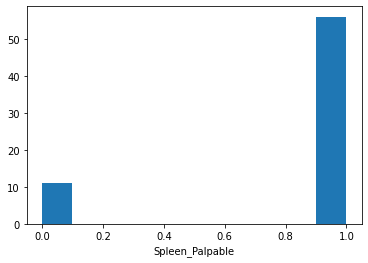

Variance of Spleen_Palpable: 0.1372243261305413
Mean of Clump Spleen_Palpable: 0.835820895522388
Median of Clump Spleen_Palpable: 1.0


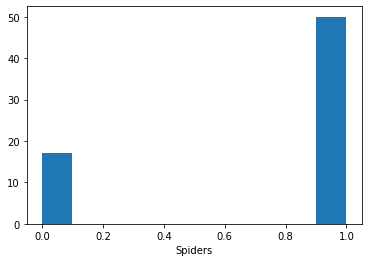

Variance of Spiders: 0.18935174871909108
Mean of Clump Spiders: 0.746268656716418
Median of Clump Spiders: 1.0


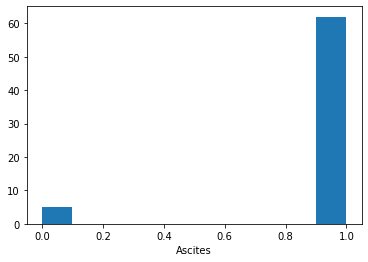

Variance of Ascites: 0.06905769659166855
Mean of Clump Ascites: 0.9253731343283582
Median of Clump Ascites: 1.0


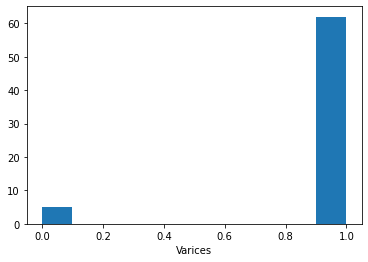

Variance of Varices: 0.06905769659166852
Mean of Clump Varices: 0.9253731343283582
Median of Clump Varices: 1.0


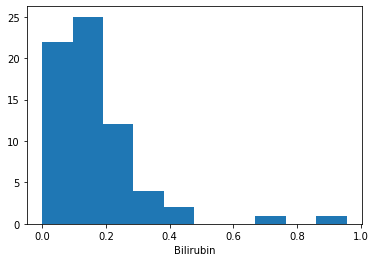

Variance of Bilirubin: 0.021343586104854387
Mean of Clump Bilirubin: 0.17479270315091208
Median of Clump Bilirubin: 0.15555555555555556


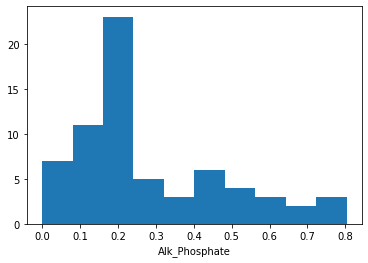

Variance of Alk_Phosphate: 0.03784336194201459
Mean of Clump Alk_Phosphate: 0.28528616758726055
Median of Clump Alk_Phosphate: 0.23228346456692914


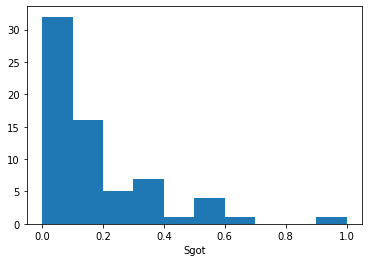

Variance of Sgot: 0.0341240797518743
Mean of Clump Sgot: 0.17362693919564737
Median of Clump Sgot: 0.10098522167487685


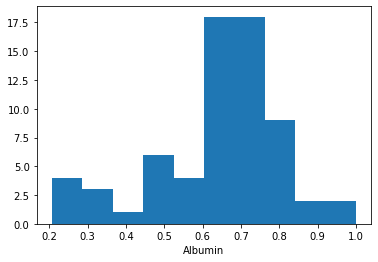

Variance of Albumin: 0.02735554661427631
Mean of Clump Albumin: 0.642820380854349
Median of Clump Albumin: 0.6551724137931034


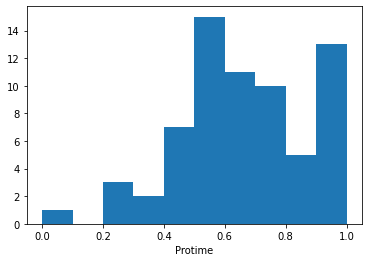

Variance of Protime: 0.04901857874805079
Mean of Clump Protime: 0.6656716417910447
Median of Clump Protime: 0.66


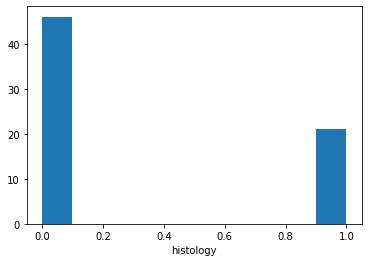

Variance of histology: 0.2151926932501671
Mean of Clump histology: 0.31343283582089554
Median of Clump histology: 0.0


In [11]:
second_class=hepatitis_np[hepatitis_np[...,0]==2] # get the data which have class 2

second_hepatitis_x = second_class[:,1:]
second_hepatitis_y = second_class[:,0].astype(int)
#plot the distribution of features of the first class
feature_dict = {'Age': second_class[:, 1], 
                'Sex': second_class[:, 2], 
                'Steroid': second_class[:, 3],
                'Antivirals': second_class[:, 4],
                'Fatigue': second_class[:, 5],
                'Malaise': second_class[:, 6],
                'Anorexia': second_class[:, 7],
                'Liver_Big': second_class[:, 8],
                'Liver_Firm': second_class[:, 9],
                'Spleen_Palpable': second_class[:, 10],
                'Spiders': second_class[:, 11],
                'Ascites': second_class[:, 12],
                'Varices': second_class[:, 13],
                'Bilirubin': second_class[:, 14],
                'Alk_Phosphate': second_class[:, 15],
                'Sgot': second_class[:, 16],
                'Albumin': second_class[:, 17],
                'Protime': second_class[:, 18],
                'histology': second_class[:, 19]
                }
plt.hist(second_hepatitis_y)
plt.xlabel('Class')
plt.show()  
for name, data in feature_dict.items():
  plt.hist(data)
  plt.xlabel(name)
  plt.show()
  print(f"Variance of {name}: {np.var(data)}")
  print(f"Mean of Clump {name}: {np.mean(data)}")
  print(f"Median of Clump {name}: {np.median(data)}")

# Different distance functions and Different K  for Breast cancer



[[  0  22  67 ... 271 452 118]
 [ 52 449 417 ... 227 295  17]
 [  2 448  64 ... 468 408 543]
 ...
 [543 291  99 ...  94 146 477]
 [544  18 283 ... 436 102 528]
 [545 495  25 ... 280 332 152]] (546, 9)


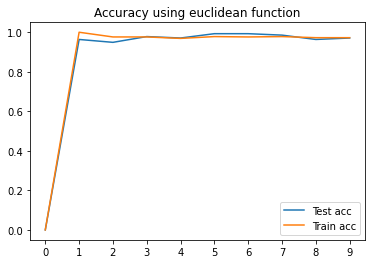

largest accuracy when K = 5, the accuracy is 99.3



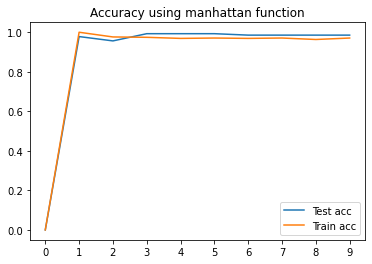

largest accuracy when K = 3, the accuracy is 99.3



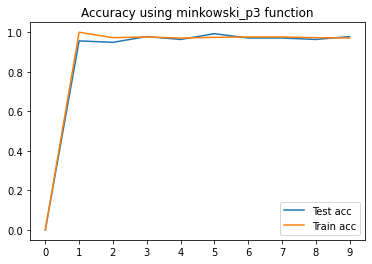

largest accuracy when K = 5, the accuracy is 99.3



In [12]:


# test the euclidean
euclidean_test_accs = [0]
euclidean_train_accs = [0]

K = range(1, 10)

for k in K:
  model = KNN(k,dist_fn=euclidean)
  model = model.fit(breast_x_train, breast_y_train)
  probs_test, knns = model.predict(breast_x_test)
  probs_train, knns = model.predict(breast_x_train)
  y_pred_test = np.argmax(probs_test,1)
  y_pred_train = np.argmax(probs_train, 1)
  test_accuracy = evaluate_acc(breast_y_test, y_pred_test)
  train_accuracy = evaluate_acc(breast_y_train, y_pred_train)
  euclidean_test_accs.append(test_accuracy)
  euclidean_train_accs.append(train_accuracy)
print(knns,knns.shape)
plt.xticks(range(0,10,1))
plt.title("Accuracy using euclidean function")
plt.plot(euclidean_test_accs, '-', label="Test acc")
plt.plot(euclidean_train_accs,'-', label="Train acc")
plt.legend()
plt.show()
print(f"largest accuracy when K = {euclidean_test_accs.index(max(euclidean_test_accs))}, the accuracy is {max(euclidean_test_accs)*100:.1f}\n")
############################################################################

# test the manhattan
manhattan_test_accs = [0]
manhattan_train_accs = [0]
K = range(1, 10)

for k in K:
  model = KNN(k,dist_fn=manhattan)
  model = model.fit(breast_x_train, breast_y_train)
  probs_test, knns = model.predict(breast_x_test)
  probs_train, knns = model.predict(breast_x_train)
  y_pred_test = np.argmax(probs_test,1)
  y_pred_train = np.argmax(probs_train, 1)
  test_accuracy = evaluate_acc(breast_y_test, y_pred_test)
  train_accuracy = evaluate_acc(breast_y_train, y_pred_train)
  manhattan_test_accs.append(test_accuracy)
  manhattan_train_accs.append(train_accuracy)

plt.xticks(range(0,10,1))
plt.title("Accuracy using manhattan function")
plt.plot(manhattan_test_accs, '-', label="Test acc")
plt.plot(manhattan_train_accs,'-', label="Train acc")
plt.legend()
plt.show()
print(f"largest accuracy when K = {manhattan_test_accs.index(max(manhattan_test_accs))}, the accuracy is {max(manhattan_test_accs)*100:.1f}\n")

############################################################################
# test the minkowski_p3
minkowski_p3_test_accs = [0]
minkowski_p3_train_accs = [0]
K = range(1, 10)

for k in K:
  model = KNN(k,dist_fn=minkowski_p3)
  model = model.fit(breast_x_train, breast_y_train)
  probs_test, knns = model.predict(breast_x_test)
  probs_train, knns = model.predict(breast_x_train)
  y_pred_test = np.argmax(probs_test,1)
  y_pred_train = np.argmax(probs_train, 1)
  test_accuracy = evaluate_acc(breast_y_test, y_pred_test)
  train_accuracy = evaluate_acc(breast_y_train, y_pred_train)
  minkowski_p3_test_accs.append(test_accuracy)
  minkowski_p3_train_accs.append(train_accuracy)

plt.xticks(range(0,10,1))
plt.title("Accuracy using minkowski_p3 function")
plt.plot(minkowski_p3_test_accs, '-', label="Test acc")
plt.plot(minkowski_p3_train_accs,'-', label="Train acc")
plt.legend()
plt.show()
print(f"largest accuracy when K = {minkowski_p3_test_accs.index(max(minkowski_p3_test_accs))}, the accuracy is {max(minkowski_p3_test_accs)*100:.1f}\n")


# Different distance functions and Different K  for hepatitis


With the hepatitis_dataset


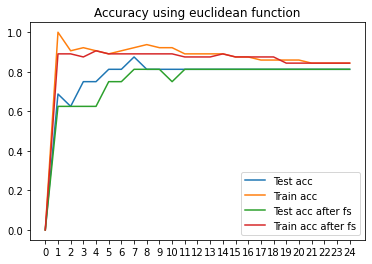

largest accuracy when K = 7, the accuracy is 87.5

largest test accuracy (feature selection) when K = 7, the accuracy is 81.2

confusion matrix:
[[ 0  3]
 [ 0 13]]


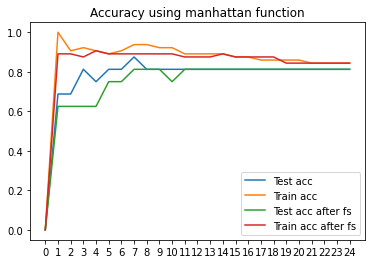

largest accuracy when K = 7, the accuracy is 87.5

largest test accuracy (feature selection) when K = 7, the accuracy is 81.2

confusion matrix:
[[ 0  3]
 [ 0 13]]


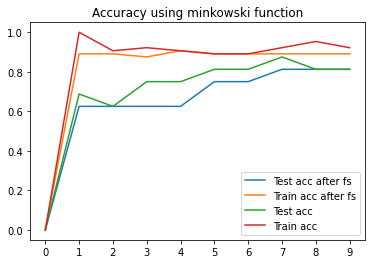

largest accuracy when K = 7, the accuracy is 87.5

largest accuracy (feature selection) when K = 7, the accuracy is 81.2

confusion matrix:
[[ 0  3]
 [ 0 13]]


In [13]:
from sklearn.metrics import confusion_matrix
#distance functions and accuracy with hepatitis_dataset
print("\nWith the hepatitis_dataset")

# test the euclidean
euclidean_test_accs = [0]
euclidean_train_accs = [0]
euclidean_test_accs_fs = [0]
euclidean_train_accs_fs = [0]
K = range(1, 25)

for k in K:
  model = KNN(k,dist_fn=euclidean)
  model = model.fit(hepatitis_x_train, hepatitis_y_train)
  probs_test, knns = model.predict(hepatitis_x_test)
  probs_train, knns_ = model.predict(hepatitis_x_train)
  y_pred_test = np.argmax(probs_test,1)
  y_pred_train = np.argmax(probs_train, 1)
  test_accuracy = evaluate_acc(hepatitis_y_test, y_pred_test)
  # test_accuracy = evaluate_acc(hepatitis_y_test, y_pred_test)
  train_accuracy = evaluate_acc(hepatitis_y_train, y_pred_train)
  euclidean_test_accs.append(test_accuracy)
  euclidean_train_accs.append(train_accuracy)

  model_fs = KNN(k,dist_fn=euclidean)
  model_fs = model_fs.fit(hepatitis_x_train_fs, hepatitis_y_train)
  probs_test_fs, knn_fs = model_fs.predict(hepatitis_x_test_fs)
  probs_train_fs, knn_fs_ = model_fs.predict(hepatitis_x_train_fs)
  y_pred_test_fs = np.argmax(probs_test_fs,1)
  y_pred_train_fs = np.argmax(probs_train_fs, 1)
  test_accuracy = evaluate_acc(hepatitis_y_test, y_pred_test_fs)
  train_accuracy = evaluate_acc(hepatitis_y_train, y_pred_train_fs)
  euclidean_test_accs_fs.append(test_accuracy)
  euclidean_train_accs_fs.append(train_accuracy)

plt.xticks(range(0,25,1))
plt.title("Accuracy using euclidean function")
plt.plot(euclidean_test_accs, '-', label="Test acc")
plt.plot(euclidean_train_accs,'-', label="Train acc")
plt.plot(euclidean_test_accs_fs, '-', label="Test acc after fs")
plt.plot(euclidean_train_accs_fs,'-', label="Train acc after fs")
plt.legend()
plt.show()
print(f"largest accuracy when K = {euclidean_test_accs.index(max(euclidean_test_accs))}, the accuracy is {max(euclidean_test_accs)*100:.1f}\n")
print(f"largest test accuracy (feature selection) when K = {euclidean_test_accs_fs.index(max(euclidean_test_accs_fs))}, the accuracy is {max(euclidean_test_accs_fs)*100:.1f}\n")
print("confusion matrix:")
print(confusion_matrix(hepatitis_y_test, y_pred_test_fs))
############################################################################

# test the manhattan
manhattan_test_accs = [0]
manhattan_train_accs = [0]
manhattan_train_accs_fs = [0]
manhattan_test_accs_fs = [0]
K = range(1, 25)

for k in K:
  model = KNN(k,dist_fn=manhattan)
  model = model.fit(hepatitis_x_train, hepatitis_y_train)
  probs_test, knns = model.predict(hepatitis_x_test)
  probs_train, knns = model.predict(hepatitis_x_train)
  y_pred_test = np.argmax(probs_test,1)
  y_pred_train = np.argmax(probs_train, 1)
  test_accuracy = evaluate_acc(hepatitis_y_test, y_pred_test)
  train_accuracy = evaluate_acc(hepatitis_y_train, y_pred_train)
  manhattan_test_accs.append(test_accuracy)
  manhattan_train_accs.append(train_accuracy)

  model_fs = KNN(k,dist_fn=manhattan)
  model_fs = model_fs.fit(hepatitis_x_train_fs, hepatitis_y_train)
  probs_test_fs, knn_fs = model_fs.predict(hepatitis_x_test_fs)
  probs_train_fs, knn_fs_ = model_fs.predict(hepatitis_x_train_fs)
  y_pred_test_fs = np.argmax(probs_test_fs,1)
  y_pred_train_fs = np.argmax(probs_train_fs, 1)
  test_accuracy = evaluate_acc(hepatitis_y_test, y_pred_test_fs)
  train_accuracy = evaluate_acc(hepatitis_y_train, y_pred_train_fs)
  manhattan_test_accs_fs.append(test_accuracy)
  manhattan_train_accs_fs.append(train_accuracy)


plt.xticks(range(0,25,1))
plt.title("Accuracy using manhattan function")
plt.plot(manhattan_test_accs, '-', label="Test acc")
plt.plot(manhattan_train_accs,'-', label="Train acc")
plt.plot(manhattan_test_accs_fs, '-', label="Test acc after fs")
plt.plot(manhattan_train_accs_fs,'-', label="Train acc after fs")
plt.legend()
plt.show()
print(f"largest accuracy when K = {manhattan_test_accs.index(max(manhattan_test_accs))}, the accuracy is {max(manhattan_test_accs)*100:.1f}\n")
print(f"largest test accuracy (feature selection) when K = {manhattan_test_accs_fs.index(max(manhattan_test_accs_fs))}, the accuracy is {max(manhattan_test_accs_fs)*100:.1f}\n")
print("confusion matrix:")
print(confusion_matrix(hepatitis_y_test, y_pred_test_fs))
############################################################################

# test the minkowski_p3
minkowski_p3_test_accs = [0]
minkowski_p3_train_accs = [0]
minkowski_p3_test_accs_fs = [0]
minkowski_p3_train_accs_fs = [0]
K = range(1, 10)

for k in K:
  model = KNN(k,dist_fn=minkowski_p3)
  model = model.fit(hepatitis_x_train, hepatitis_y_train)
  probs_test, knns = model.predict(hepatitis_x_test)
  probs_train, knns = model.predict(hepatitis_x_train)
  y_pred_test = np.argmax(probs_test,1)
  y_pred_train = np.argmax(probs_train, 1)
  test_accuracy = evaluate_acc(hepatitis_y_test, y_pred_test)
  train_accuracy = evaluate_acc(hepatitis_y_train, y_pred_train)
  minkowski_p3_test_accs.append(test_accuracy)
  minkowski_p3_train_accs.append(train_accuracy)

  model_fs = KNN(k,dist_fn=minkowski_p3)
  model_fs = model_fs.fit(hepatitis_x_train_fs, hepatitis_y_train)
  probs_test_fs, knn_fs = model_fs.predict(hepatitis_x_test_fs)
  probs_train_fs, knn_fs_ = model_fs.predict(hepatitis_x_train_fs)
  y_pred_test_fs = np.argmax(probs_test_fs,1)
  y_pred_train_fs = np.argmax(probs_train_fs, 1)
  test_accuracy = evaluate_acc(hepatitis_y_test, y_pred_test_fs)
  train_accuracy = evaluate_acc(hepatitis_y_train, y_pred_train_fs)
  minkowski_p3_test_accs_fs.append(test_accuracy)
  minkowski_p3_train_accs_fs.append(train_accuracy)

plt.xticks(range(0,10,1))
plt.title("Accuracy using minkowski function")
plt.plot(minkowski_p3_test_accs_fs, '-', label="Test acc after fs")
plt.plot(minkowski_p3_train_accs_fs,'-', label="Train acc after fs")
plt.plot(minkowski_p3_test_accs, '-', label="Test acc")
plt.plot(minkowski_p3_train_accs,'-', label="Train acc")
plt.legend()
plt.show()
print(f"largest accuracy when K = {minkowski_p3_test_accs.index(max(minkowski_p3_test_accs))}, the accuracy is {max(minkowski_p3_test_accs)*100:.1f}\n")
print(f"largest accuracy (feature selection) when K = {minkowski_p3_test_accs_fs.index(max(minkowski_p3_test_accs_fs))}, the accuracy is {max(minkowski_p3_test_accs_fs)*100:.1f}\n")
#confusion matrix
print("confusion matrix:")
print(confusion_matrix(hepatitis_y_test, y_pred_test_fs))

## Decision Boundaries for Breast
To draw the decision boundary we classify all the points on a 2D grid. The `meshgrid` function creates all the points on the grid by taking discretizations of horizontal and vertical axes.

using euclidean to draw boundaries


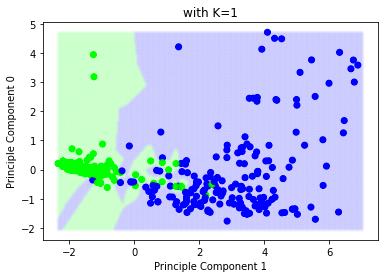

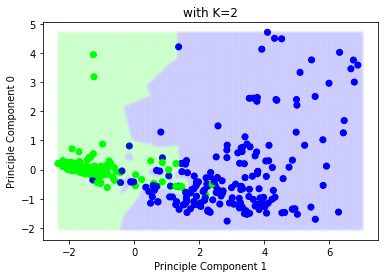

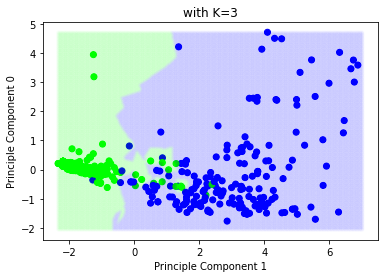

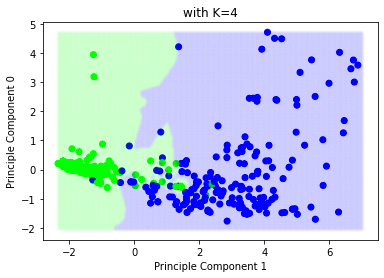

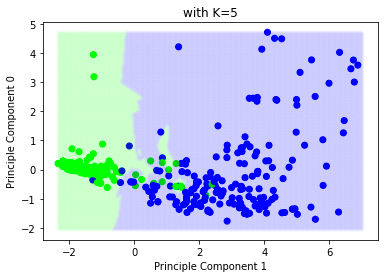

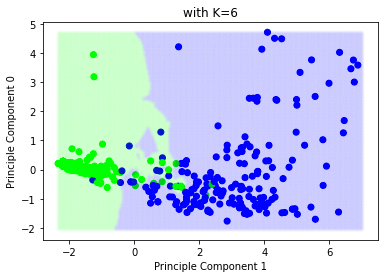

********************************************************************************
using manhattan to draw boundaries


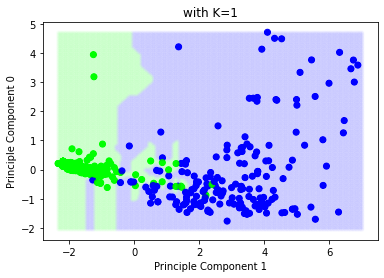

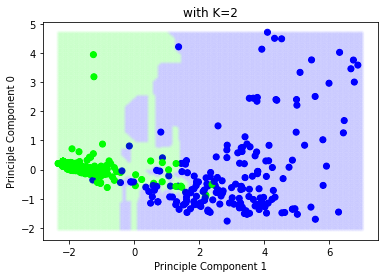

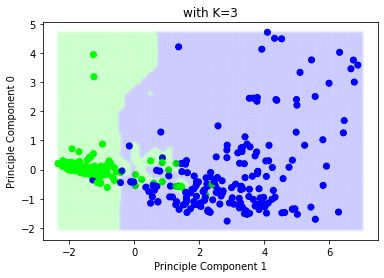

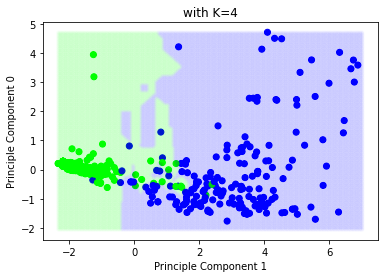

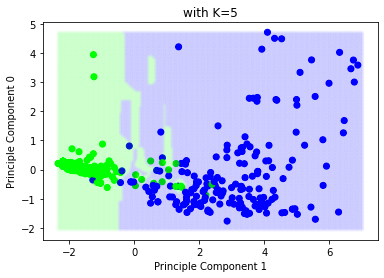

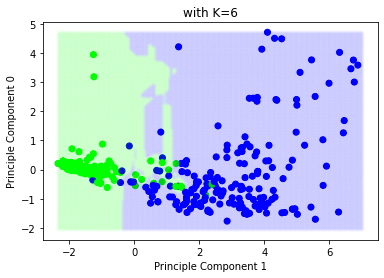

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

std_breast_x = StandardScaler().fit_transform(breast_x)

b_pca=PCA(n_components=2,copy=True)
b_principal_components = b_pca.fit_transform(std_breast_x)

std_breast_x_train = b_principal_components[breast_inds[:breast_partition]]

#we can make the grid finer by increasing the number of samples from 200 to higher value
x0v = np.linspace(np.min(b_principal_components[:,0]), np.max(b_principal_components[:,0]), 250)
x1v = np.linspace(np.min(b_principal_components[:,1]), np.max(b_principal_components[:,1]), 250)

#to features values as a mesh  
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

C = int(np.max(breast_y))+1

print("using euclidean to draw boundaries")
for k in range(1,7):
  model = KNN(k,  euclidean)   #using euclidean to draw boundaries

  y_train_prob = np.zeros((breast_y_train.shape[0], C))
  y_train_prob[np.arange(breast_y_train.shape[0]), breast_y_train] = 1
  

  #to get class probability of all the points in the 2D grid
  y_prob_all, knns = model.fit(std_breast_x_train, breast_y_train).predict(x_all)

  y_pred_all = np.zeros_like(y_prob_all)
  y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1

  plt.scatter(std_breast_x_train[:,0], std_breast_x_train[:,1], c=y_train_prob, marker='o', alpha=1)
  plt.scatter(x_all[:,0], x_all[:,1], c=y_pred_all, marker='.', alpha=0.01)
  plt.title(f"with K={k}")
  plt.ylabel('Principle Component 0')
  plt.xlabel('Principle Component 1')
  plt.show()

################################
print("********************************************************************************")
print("using manhattan to draw boundaries")
for k in range(1,7):
  model = KNN(k, manhattan)   #using manhattan to draw boundaries

  y_train_prob = np.zeros((breast_y_train.shape[0], C))
  y_train_prob[np.arange(breast_y_train.shape[0]), breast_y_train] = 1
  
  #to get class probability of all the points in the 2D grid
  y_prob_all, knns = model.fit(std_breast_x_train, breast_y_train).predict(x_all)

  y_pred_all = np.zeros_like(y_prob_all)
  y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1

  plt.scatter(std_breast_x_train[:,0], std_breast_x_train[:,1], c=y_train_prob, marker='o', alpha=1)
  plt.scatter(x_all[:,0], x_all[:,1], c=y_pred_all, marker='.', alpha=0.01)
  plt.title(f"with K={k}")
  plt.ylabel('Principle Component 0')
  plt.xlabel('Principle Component 1')
  plt.show()


## Decision Boundaries for Hepatitis

To draw the decision boundary we classify all the points on a 2D grid. The `meshgrid` function creates all the points on the grid by taking discretizations of horizontal and vertical axes.

using euclidean to draw boundaries


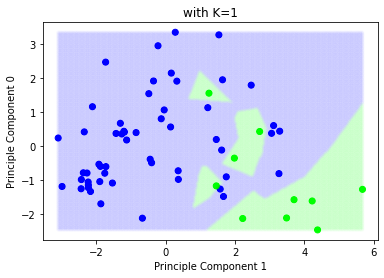

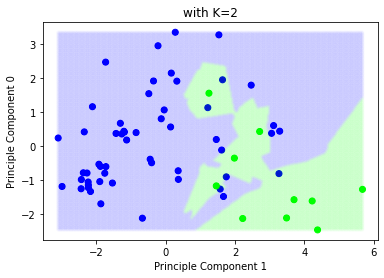

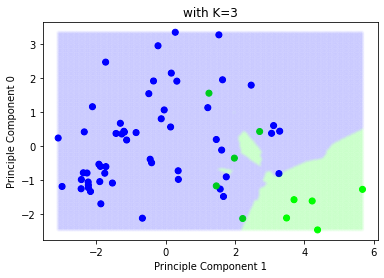

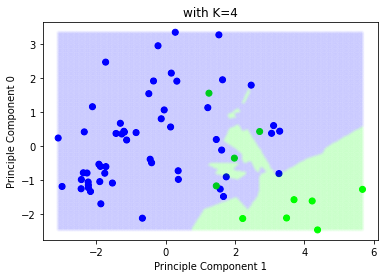

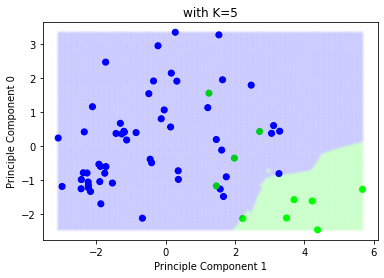

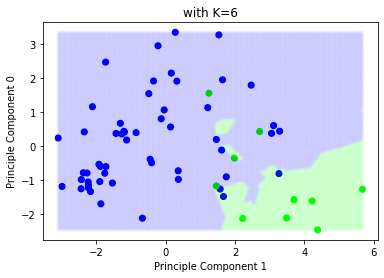

********************************************************************************
using manhattan to draw boundaries


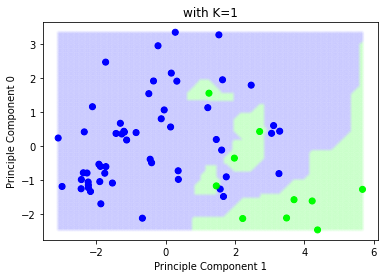

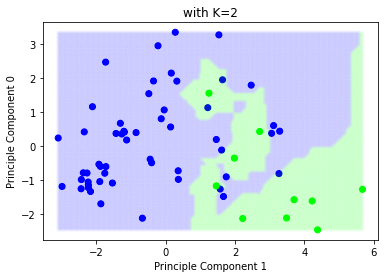

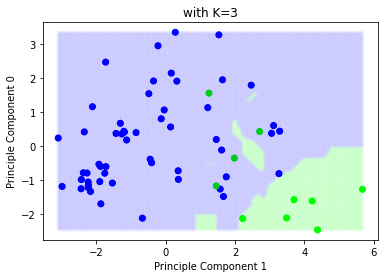

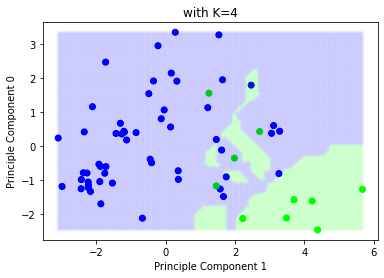

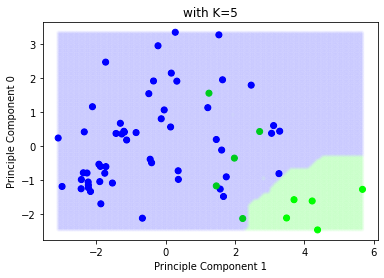

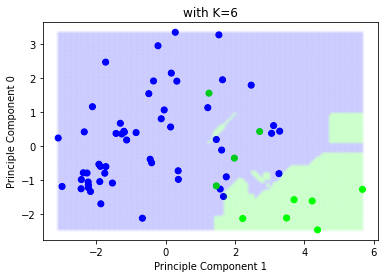

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

std_hepatitis_x = StandardScaler().fit_transform(hepatitis_x)

h_pca=PCA(n_components=2,copy=True)
h_principal_components = h_pca.fit_transform(std_hepatitis_x)

std_hepatitis_x_train = h_principal_components[hepatitis_inds[:hepatitis_partition]]

#we can make the grid finer by increasing the number of samples from 200 to higher value
x0v = np.linspace(np.min(h_principal_components[:,0]), np.max(h_principal_components[:,0]), 250)
x1v = np.linspace(np.min(h_principal_components[:,1]), np.max(h_principal_components[:,1]), 250)

#to features values as a mesh  
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

C = int(np.max(hepatitis_y))+1

print("using euclidean to draw boundaries")
for k in range(1,7):
  model = KNN(k, euclidean)   #using euclidean to draw boundaries

  y_train_prob = np.zeros((hepatitis_y_train.shape[0], C))
  y_train_prob[np.arange(hepatitis_y_train.shape[0]), hepatitis_y_train] = 1
  

  #to get class probability of all the points in the 2D grid
  y_prob_all, knns = model.fit(std_hepatitis_x_train, hepatitis_y_train).predict(x_all)

  y_pred_all = np.zeros_like(y_prob_all)
  y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1

  plt.scatter(std_hepatitis_x_train[:,0], std_hepatitis_x_train[:,1], c=y_train_prob, marker='o', alpha=1)
  plt.scatter(x_all[:,0], x_all[:,1], c=y_pred_all, marker='.', alpha=0.01)
  plt.title(f"with K={k}")
  plt.ylabel('Principle Component 0')
  plt.xlabel('Principle Component 1')
  plt.show()

################################
print("********************************************************************************")
print("using manhattan to draw boundaries")
for k in range(1,7):
  model = KNN(k, manhattan)   #using manhattan to draw boundaries

  y_train_prob = np.zeros((hepatitis_y_train.shape[0], C))
  y_train_prob[np.arange(hepatitis_y_train.shape[0]), hepatitis_y_train] = 1
  

  #to get class probability of all the points in the 2D grid
  y_prob_all, knns = model.fit(std_hepatitis_x_train, hepatitis_y_train).predict(x_all)

  y_pred_all = np.zeros_like(y_prob_all)
  y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1

  plt.scatter(std_hepatitis_x_train[:,0], std_hepatitis_x_train[:,1], c=y_train_prob, marker='o', alpha=1)
  plt.scatter(x_all[:,0], x_all[:,1], c=y_pred_all, marker='.', alpha=0.01)
  plt.title(f"with K={k}")
  plt.ylabel('Principle Component 0')
  plt.xlabel('Principle Component 1')
  plt.show()